<a href="https://colab.research.google.com/github/LelouchFT/Analyse-donnees-temporelles/blob/main/StarterNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎉 Welcome to the ' SheCures: AI for Diabetes Prediction – Celebrating International Girls in ICT Day' Hackathon Starter Notebook
This notebook will help you get started on your journey to building an AI model for predicting diabetes types in African women.
**Organized by Dare to be Women Tech** in celebration of *International Girls in ICT Day*.

## 🧩 Problem Statement
Your task is to build a machine learning model that can classify the type of diabetes (e.g., Type 2 or gestational) in women based on health-related features.

In [ ]:
# 📦 Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.impute import KNNImputer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# 📦 Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore")

In [ ]:
# 📂 Load the dataset (update the path as needed)
df = pd.read_csv("/content/Train.csv")
df.head()

,Genetic Markers,Family History,Insulin Levels,Blood Glucose Levels,Glucose Tolerance Test,BMI,Waist Circumference,Physical Activity,Dietary Habits,Smoking Status,...,Blood Pressure,Cholesterol Levels,Liver Function Tests,Previous Gestational Diabetes,Pregnancy History,Weight Gain During Pregnancy,Ethnicity,Socioeconomic Factors,Target,ID
0,Negative,No,33,147,Abnormal,29,34,Moderate,Healthy,Non-Smoker,...,125,207,Normal,No,Complications,28,Low Risk,Low,Type 2 Diabetes,ID_0000ff
1,Negative,Yes,20,118,Normal,24,35,High,Unhealthy,Non-Smoker,...,121,210,Normal,Yes,Complications,15,High Risk,Medium,Prediabetic,ID_000372
2,Negative,Yes,14,142,Abnormal,22,30,Low,Healthy,Non-Smoker,...,90,167,Normal,Yes,Complications,13,Low Risk,Low,Type 1 Diabetes,ID_0005b8
3,Negative,Yes,38,141,Abnormal,27,34,High,Healthy,Smoker,...,119,219,Normal,No,Normal,25,Low Risk,High,Type 2 Diabetes,ID_000f18
4,Positive,Yes,20,120,Abnormal,24,36,Low,Unhealthy,Smoker,...,120,223,Normal,Yes,Complications,10,Low Risk,Medium,Gestational Diabetes,ID_0011f6


In [ ]:
# ℹ️ Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15094 entries, 0 to 15093
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Genetic Markers                15094 non-null  object
 1   Family History                 15094 non-null  object
 2   Insulin Levels                 15094 non-null  int64 
 3   Blood Glucose Levels           15094 non-null  int64 
 4   Glucose Tolerance Test         15094 non-null  object
 5   BMI                            15094 non-null  int64 
 6   Waist Circumference            15094 non-null  int64 
 7   Physical Activity              15094 non-null  object
 8   Dietary Habits                 15094 non-null  object
 9   Smoking Status                 15094 non-null  object
 10  Alcohol Consumption            15094 non-null  object
 11  Blood Pressure                 15094 non-null  int64 
 12  Cholesterol Levels             15094 non-null  int64 
 13  L

In [ ]:
# 📊 Basic statistics
df.describe()

,Insulin Levels,Blood Glucose Levels,BMI,Waist Circumference,Blood Pressure,Cholesterol Levels,Weight Gain During Pregnancy
count,15094.000000,15094.000000,15094.000000,15094.000000,15094.000000,15094.000000,15094.000000
mean,20.145952,128.760302,26.078309,35.738174,117.043328,208.352458,20.120578
std,9.633169,25.548681,5.607679,5.041412,12.844156,34.766744,7.616550
min,5.000000,90.000000,15.000000,28.000000,90.000000,150.000000,5.000000
25%,13.000000,110.000000,22.000000,32.000000,109.000000,182.000000,15.000000
50%,18.000000,122.000000,26.000000,35.000000,117.000000,204.000000,20.000000
75%,25.000000,141.000000,30.000000,39.000000,125.000000,230.000000,25.000000
max,49.000000,199.000000,39.000000,49.000000,149.000000,299.000000,39.000000


In [ ]:
df.columns

Index(['Genetic Markers', 'Family History', 'Insulin Levels',
       'Blood Glucose Levels', 'Glucose Tolerance Test', 'BMI',
       'Waist Circumference', 'Physical Activity', 'Dietary Habits',
       'Smoking Status', 'Alcohol Consumption', 'Blood Pressure',
       'Cholesterol Levels', 'Liver Function Tests',
       'Previous Gestational Diabetes', 'Pregnancy History',
       'Weight Gain During Pregnancy', 'Ethnicity', 'Socioeconomic Factors',
       'Target', 'ID'],
      dtype='object')

In [ ]:
df.shape

(15094, 21)

In [ ]:
# 🧮 Class distribution
df['Target'].value_counts()

,count
Target,
Type 1 Diabetes,3825
Type 2 Diabetes,3795
Prediabetic,3752
Gestational Diabetes,3722


<Axes: >

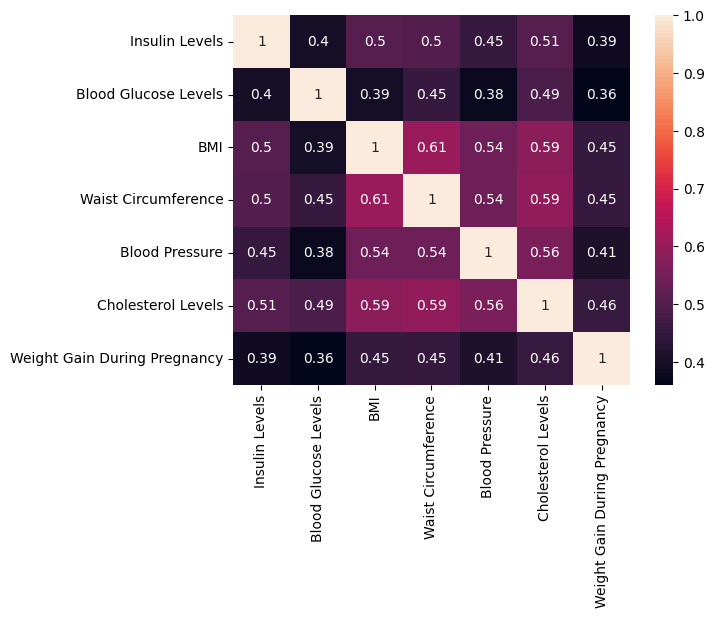

In [ ]:
# 🔍 Correlation heatmap
sns.heatmap(df.corr(numeric_only = True),annot = True)

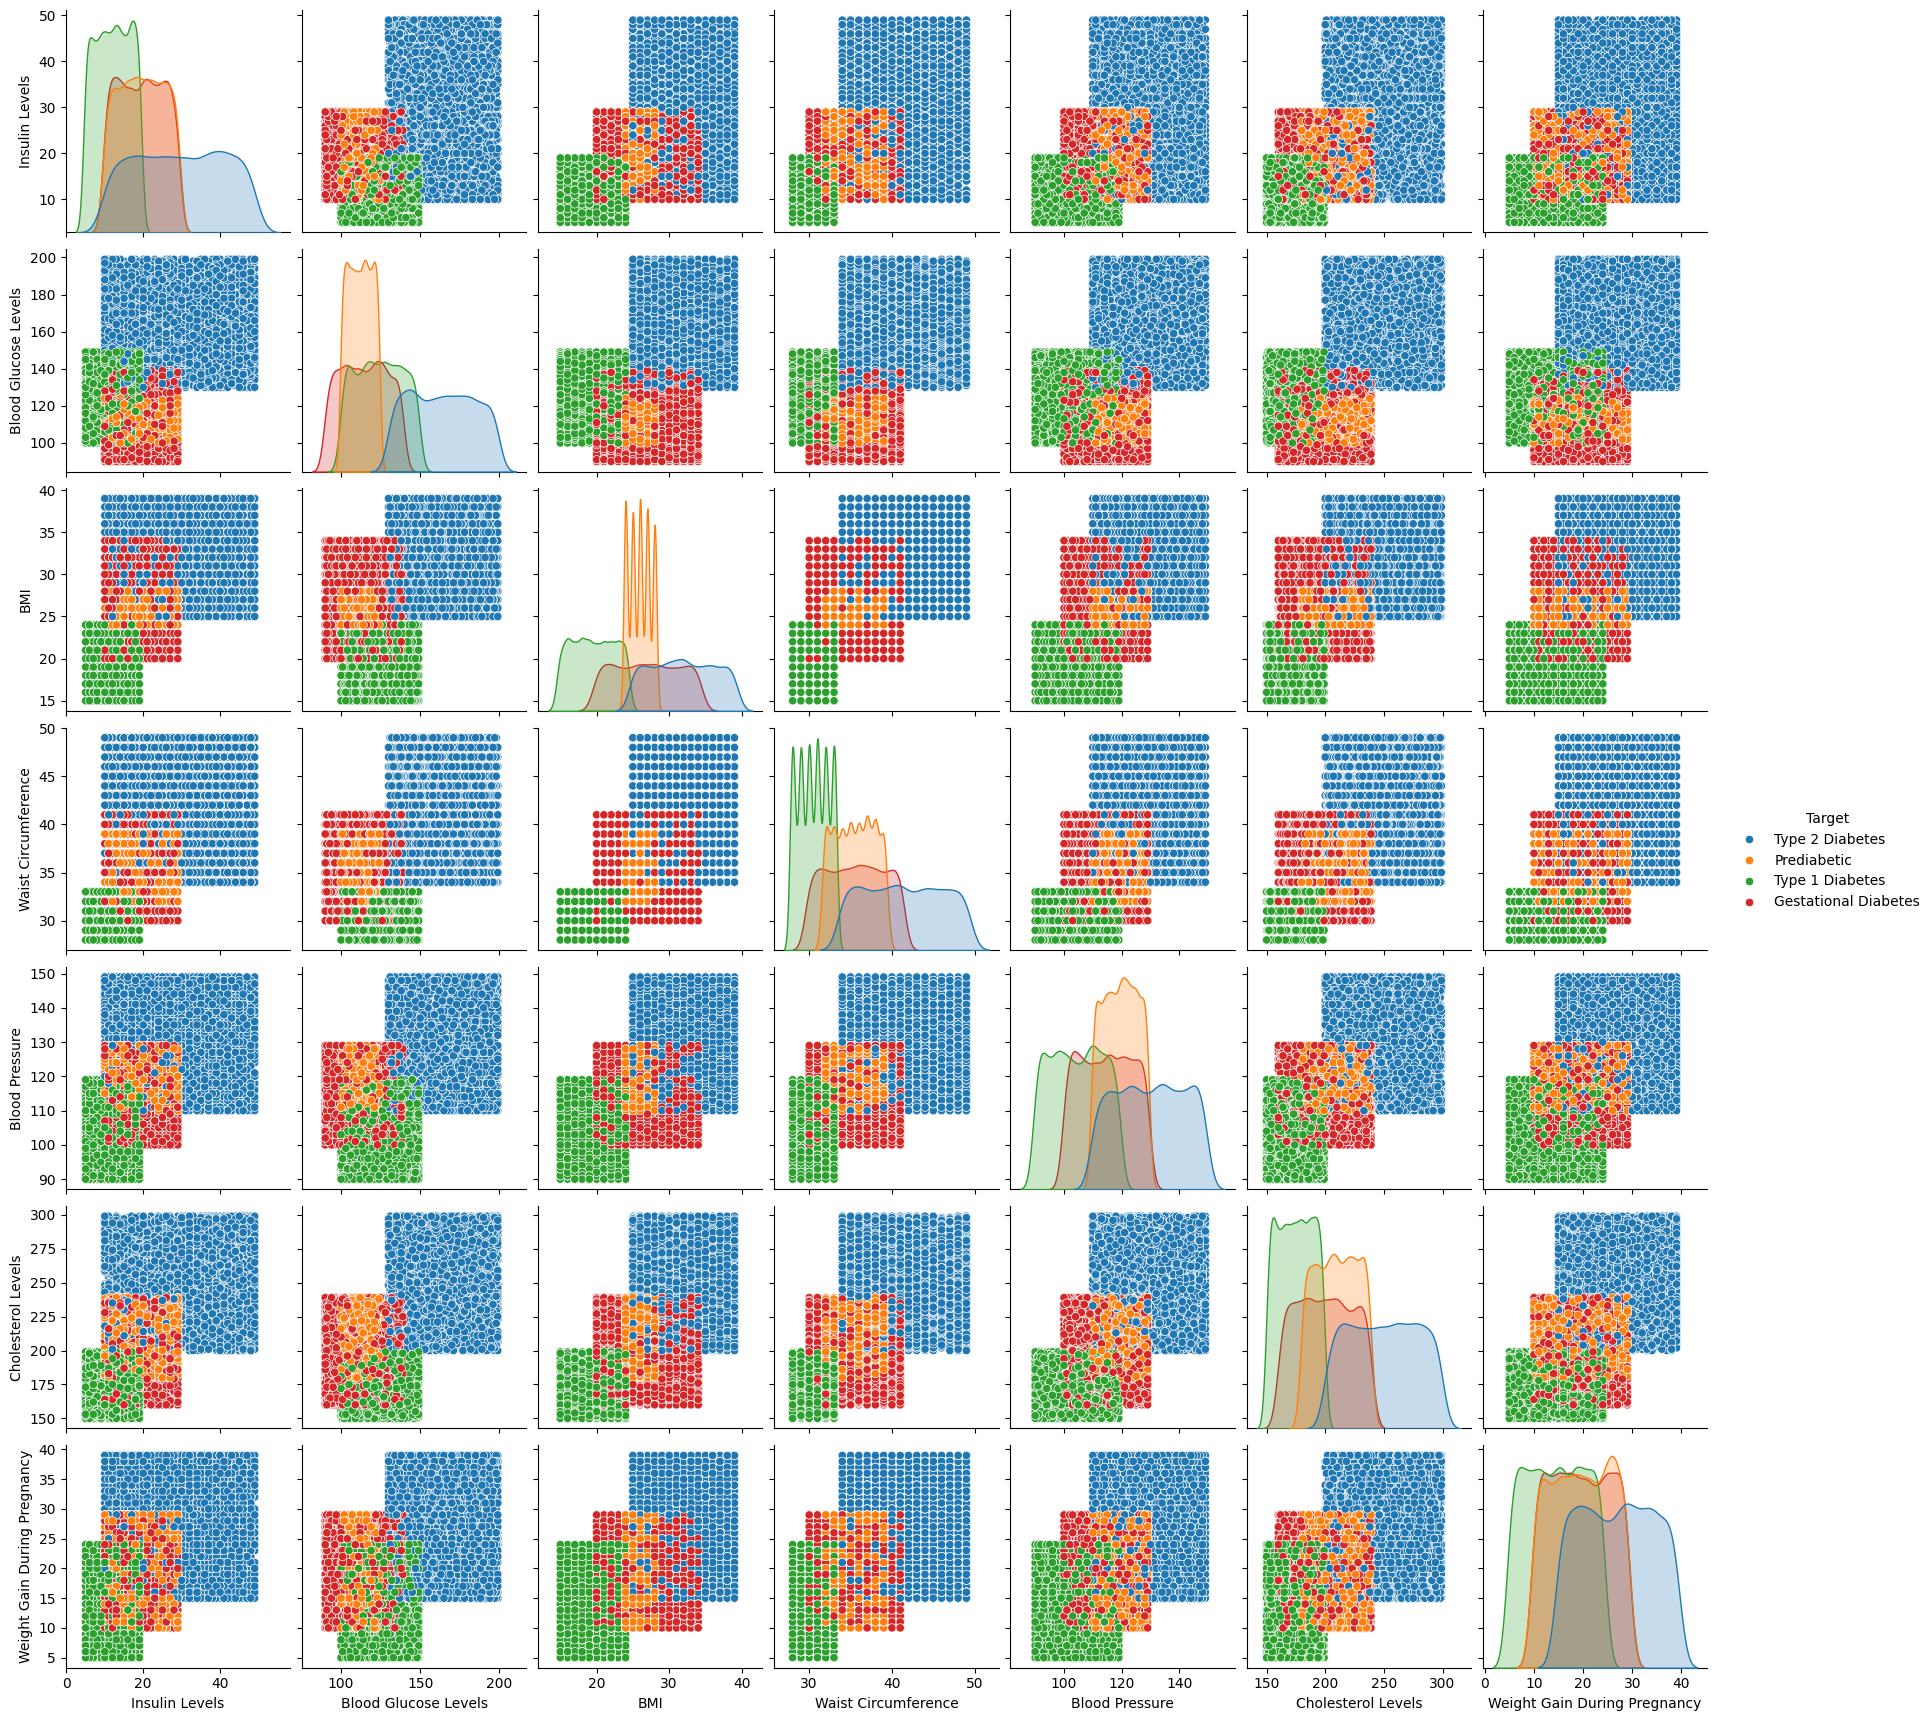

In [ ]:
#pairplot of numérical features
sns.pairplot(data = df,hue = "Target")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15094 entries, 0 to 15093
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Genetic Markers                15094 non-null  object
 1   Family History                 15094 non-null  object
 2   Insulin Levels                 15094 non-null  int64 
 3   Blood Glucose Levels           15094 non-null  int64 
 4   Glucose Tolerance Test         15094 non-null  object
 5   BMI                            15094 non-null  int64 
 6   Waist Circumference            15094 non-null  int64 
 7   Physical Activity              15094 non-null  object
 8   Dietary Habits                 15094 non-null  object
 9   Smoking Status                 15094 non-null  object
 10  Alcohol Consumption            15094 non-null  object
 11  Blood Pressure                 15094 non-null  int64 
 12  Cholesterol Levels             15094 non-null  int64 
 13  L

In [ ]:
# 🎯 Data preprocessing
#num_features = ["Insulin Levels","Blood Glucose Levels","BMI","Waist Circumference","Cholesterol Levels","Blood Pressure","Cholesterol Levels"]
#cat_features = ["Genetic Markers","Family History","Glucose Tolerance Test","Physical Activity","Dietary Habits","Smoking Status","Alcohol Consumption","Liver Function Tests","Previous Gestational Diabetes","Ethnicity","Pregnancy History","Socioeconomic Factors"]
num_features = ["Insulin Levels","Blood Glucose Levels","BMI","Waist Circumference","Cholesterol Levels","Blood Pressure","Weight Gain During Pregnancy"]
cat_features = ["Family History","Physical Activity","Smoking Status","Alcohol Consumption","Liver Function Tests","Socioeconomic Factors"]

num_transformer = Pipeline([
    ("imputer", KNNImputer(n_neighbors = 5)),
    ("scaler", MinMaxScaler())
])

#cat_transformer = Pipeline([
#    ("encoder", OrdinalEncoder(handle_unknown = "ignore"))
#])
cat_transformer = Pipeline([
    ("encoder", OrdinalEncoder())
])
preprocessor = ColumnTransformer([
    ("num", num_transformer, num_features),
    ("cat", cat_transformer, cat_features)
])

In [ ]:
df["Target"].replace(['Type 1 Diabetes', 'Type 2 Diabetes', 'Prediabetic',
       'Gestational Diabetes'],[1,2,3,4],inplace = True)

In [ ]:
x =df.Target.info()

<class 'pandas.core.series.Series'>
RangeIndex: 15094 entries, 0 to 15093
Series name: Target
Non-Null Count  Dtype
--------------  -----
15094 non-null  int64
dtypes: int64(1)
memory usage: 118.1 KB


In [ ]:
# Encode categorical variables and split features/target as needed
df_cleaned = preprocessor.fit_transform(df)
new_columns = (
    num_features +
    list(preprocessor.named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(cat_features))
)

# Convert in Pandas DataFrame
df_cleaned = pd.DataFrame(df_cleaned, columns=new_columns)

X_train,X_test,y_train,y_test = train_test_split(df_cleaned, df.Target, test_size = 0.2, random_state = 42)

In [ ]:
def train_model2(model,param,xtrain,ytrain,xtest,ytest):
    print("", model)
    grid = GridSearchCV(model,param,cv=5)
    grid.fit(xtrain,ytrain)
    # Meilleurs paramètres
    print("Meilleurs paramètres :", grid.best_params_)

    # Meilleur modèle
    best_model = grid.best_estimator_
    print("Score sur les données de val :", best_model.score(X_test, y_test))
    ypred = best_model.predict(xtest)
    print( classification_report(ypred, ytest))
    acc = accuracy_score(ypred, ytest)

    return ypred, acc

In [ ]:
# 🤖 Baseline prediction Model
param_random = {"n_estimators":[100,200,300,180],"max_depth" :[30,40,60,20],"min_samples_split" :[1,2,3,4], "max_features" : ["sqrt" ,"log2",None,0.5], "bootstrap" :[True,False] }
param_svc = { "C" :[0.1,1,10,100] ,"kernel": ["linear","poly","sigmoid","rbf"] , "gamma" : ["scale","auto" , 0.01, 0.05] ,"degree" : [2,3,4,5] }
param_reg = { "C" : [0.01,0.1 ,1,10,100],
              "penalty" : ["l1","l2","none","elasticnet"] ,
              "solver" : ["liblinear" ,"saga", "newton-cg", "lbfgs"] ,
             }
param_tree ={ "critesion":["gini","entropy"] ,
              "max_depth" :[30,40,60,20],
              "min_samples_split" :[1,2,4,6,5],
              "max_features" : ["sqrt" ,"log2",None,0.5],
              "min_samples_leaf" :[1,2,4,5],
             }
svm_model = (SVC(), param_svc)
forest_model = (RandomForestClassifier(),param_random)
tree_model = ( DecisionTreeClassifier() , param_tree )
reg_model = ( LogisticRegression() , param_reg)

models =[svm_model, forest_model, tree_model, reg_model]

def train_model(model,xtrain,ytrain,xtest,ytest):
    print("", model)
    model.fit(xtrain,ytrain)

    ypred = model.predict(xtest)
    print( classification_report(ypred, ytest))
    acc = accuracy_score(ypred, ytest)

    return ypred, acc

#choose the best model
for model in models :
    mod , param = model
    ypred,acc = train_model2(mod,param,X_train,y_train,X_test,y_test)
    print("Accuracy: ",acc)
#best_model

 SVC()


KeyboardInterrupt: 

In [ ]:
# 📦 Importing libraries
import pandas as pd
import numpy as np
#from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
# 📦 Importing libraries
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import warnings
warnings.filterwarnings("ignore")



# 📂 Load the dataset (update the path as needed)
df = pd.read_csv("/content/Train.csv")

df["Target"].replace(['Type 1 Diabetes', 'Type 2 Diabetes', 'Prediabetic', 'Gestational Diabetes'],[0,1,2,3],inplace = True)

def preprocessing(data):
 # 🎯 Data preprocessing
 num_features = ["Insulin Levels","Blood Glucose Levels","BMI","Waist Circumference","Cholesterol Levels","Blood Pressure","Weight Gain During Pregnancy"]
 cat_features = ["Genetic Markers","Family History","Glucose Tolerance Test","Physical Activity","Dietary Habits","Smoking Status","Alcohol Consumption","Liver Function Tests","Previous Gestational Diabetes","Ethnicity","Pregnancy History","Socioeconomic Factors"]

 num_transformer = Pipeline([
     ("imputer", KNNImputer(n_neighbors = 5)),
     ("scaler", StandardScaler())
 ])

 #cat_transformer = Pipeline([
 #    ("encoder", OneHotEncoder(handle_unknown = "ignore"))
 #])

 cat_transformer = Pipeline([
     ("encoder", OrdinalEncoder())
 ])
 preprocessor = ColumnTransformer([
     ("num", num_transformer, num_features),
     ("cat", cat_transformer, cat_features)
 ])


       # Encode categorical variables and split features/target as needed
 df_cleaned = preprocessor.fit_transform(data)
 new_columns = (
               num_features +
            list(preprocessor.named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(cat_features))
           )

       # Convert in Pandas DataFrame
 df_cleaned = pd.DataFrame(df_cleaned, columns=new_columns)

 return df_cleaned




df_cleaned = preprocessing(df)

X_train,X_test,y_train,y_test = train_test_split(df_cleaned, df.Target, test_size = 0.2, random_state = 42)




       # 🤖 Baseline prediction Model
param_random = {"n_estimators":[100,200,300,180],"max_depth" :[30,40,60,20],"min_samples_split" :[1,2,3,4], "max_features" : ["sqrt" ,"log2",None,0.5], "bootstrap" :[True,False] }
param_svc = { "C" :[0.1,1,10,100] ,
     "kernel": ["linear","poly","sigmoid","rbf"] ,
     "gamma" : ["scale","auto" , 0.01, 0.05] ,
     "degree" : [2,3,4,5]
   }
param_reg = { "C" : [0.01,0.1 ,1,10,100],
              "penalty" : ["l1","l2","none","elasticnet"] ,
           "solver" : ["liblinear" ,"saga", "newton-cg", "lbfgs"] ,
            }
param_tree = { "criterion":["gini","entropy"] ,
               "max_depth" :[30,40,60,20],
               "min_samples_split" :[1,2,4,6,5],
            "max_features" : ["sqrt" ,"log2",None,0.5],
           "min_samples_leaf" :[1,2,4,5]
          }

#xgb = XGBClassifier(objective='multi:softprob', num_class=4, use_label_encoder=False, eval_metric='mlogloss')

param_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'max_depth': [3, 5, 6, 8, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'reg_lambda': [0.1, 1, 5],
    'reg_alpha': [0, 0.5, 1]
}

svm_model = (SVC(), param_svc)
forest_model = (RandomForestClassifier(),param_random)
tree_model = ( DecisionTreeClassifier() , param_tree )
reg_model = ( LogisticRegression() , param_reg)

models =[ forest_model, tree_model, reg_model ]

param_knn = {
    'n_neighbors': [10,5,4,7,3],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

param_xgboost= {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'max_depth': [3, 5, 6, 8, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'reg_lambda': [0.1, 1, 5],
    'reg_alpha': [0, 0.5, 1],
}
knn = [(KNeighborsClassifier(), param_knn)]





def train_model2(model,param,xtrain,ytrain,xtest,ytest):
       print("", model)
       grid = GridSearchCV(model,param,cv=5)
       grid.fit(xtrain,ytrain)
       # Meilleurs paramètres
       print("Meilleurs paramètres :", grid.best_params_)

       # Meilleur modèle
       best_model = grid.best_estimator_
       print("Score sur les données de val :", best_model.score(X_test, y_test))
       ypred = best_model.predict(xtest)
       print( classification_report(ypred, ytest))
       acc = accuracy_score(ypred, ytest)

       return best_model,ypred, acc


def train_model3(model,param,xtrain,ytrain,xtest,ytest):
       print("", model)
       grid = RandomizedSearchCV(model, param_distributions=param, cv=5, n_iter=30,n_jobs=-1, random_state=42)

       grid.fit(xtrain,ytrain)
       # Meilleurs paramètres
       print("Meilleurs paramètres :", grid.best_params_)

       # Meilleur modèle
       best_model = grid.best_estimator_
       print("Score sur les données de val :", best_model.score(X_test, y_test))
       ypred = best_model.predict(xtest)
       print( classification_report(ypred, ytest))
       acc = accuracy_score(ypred, ytest)

       return best_model,ypred, acc


def train_model(model,xtrain,ytrain,xtest,ytest):
       print("", model)
       model.fit(xtrain,ytrain)

       ypred = model.predict(xtest)
       print( classification_report(ypred, ytest))
       acc = accuracy_score(ypred, ytest)

       return model,ypred, acc

       #choose the best model

from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='mlogloss'
)


from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


best = RandomForestClassifier(
                                                        n_estimators = 100,
                                                        max_features = 'sqrt' ,
                                                        min_samples_split = 4 ,
                                                        bootstrap = False
                                                        )
decisionT = DecisionTreeClassifier(
                                                              max_depth = 40,
                                                              min_samples_split = 6,
                                                              min_samples_leaf=  5,
                                                              criterion =  'gini',
                                                              max_features = 0.5
                                                              )                                                        max_depth = 40,

stacking_clf = StackingClassifier(
    estimators=[
        ('dt', decisionT),

        ('rf', best)
    ],
    final_estimator=xgb_model #XGBClassifier(
        #n_estimators=200, learning_rate=0.1, max_depth=6, use_label_encoder=False, eval_metric='mlogloss'
    #)
)

i = 1
test_df = pd.read_csv(f'/content/Test.csv')
id = test_df.ID
#test_df = test_df[df_cleaned.columns]
#print(test_df.columns)
#print(df_cleaned.columns)

#print(test_df.info())
#print(df_cleaned.info())


for model in [stacking_clf] :
       #mod , param = model
       best_model,ypred,acc = train_model(model,X_train,y_train,X_test,y_test)
       print("Accuracy: ",acc)
       #best_model

       #📤 Generate submission file (update for actual test set)

       predictions = best_model.predict(preprocessing(test_df))
       submission = pd.DataFrame({"ID": id , "Target": predictions})
       submission["Target"].replace([0,1,2,3] , ['Type 1 Diabetes', 'Type 2 Diabetes', 'Prediabetic',
       'Gestational Diabetes'],inplace = True)
       submission.to_csv('submissionStaking2.csv', index=False)

SyntaxError: invalid syntax (<ipython-input-2-0b1f98051cd2>, line 220)

In [ ]:
from xgboost import XGBClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:


# 📤 Generate submission file (update for actual test set)
# test_df = pd.read_csv('Test.csv')
# predictions = best_model.predict(test_df)
# submission = pd.DataFrame({"id": test_df['id'], "diabetes_type": predictions})
# submission.to_csv('submission.csv', index=False)

## 🚀 Next Steps
- Try more advanced models (XGBoost, etc.)
- Perform feature engineering and selection
- Consider model interpretability (SHAP, LIME) for healthcare applications

Good luck, and thank you for being part of this impactful challenge! 💙